In [141]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint

import warnings
warnings.filterwarnings("ignore")

In [142]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [143]:
print("Shape: ", df.shape)
print("-"*40)
print("Columns: ", df.columns)
print("-"*40)
print(df.info())
print("-"*40)
print("Null value check\n:", df.isnull().sum())

Shape:  (768, 9)
----------------------------------------
Columns:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), i

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 51.1 KB


In [144]:
print("Unique values in the output labels: ")
df['Outcome'].unique()

Unique values in the output labels: 


array([1, 0], dtype=int64)

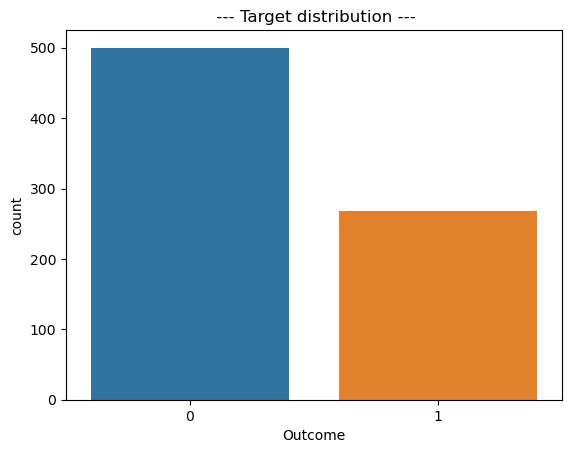



0    500
1    268
Name: Outcome, dtype: int64


In [145]:
sns.countplot(x='Outcome', data=df)
plt.title(" --- Target distribution ---")
plt.show()

print("\n")
print(df['Outcome'].value_counts())

In [146]:
px.pie(df,'Outcome',color='Outcome', color_discrete_map={'0':'red','1':'green'},
       title = "Data Distribution")

INFERENCES:

* Data is highly imbalance

In [147]:
# Outlier Analysis:
for column in df.drop("Outcome",axis=1).columns[:5]:

    # for loop auto iterates through the first five feature columns in the dataframe

    fig = px.box(data_frame =df ,
                 x='Outcome',
                 color = 'Outcome',
                 y = column,
                 color_discrete_sequence = ["#005A75","#D4FF5C"],
                 orientation = 'v')

    fig.show()

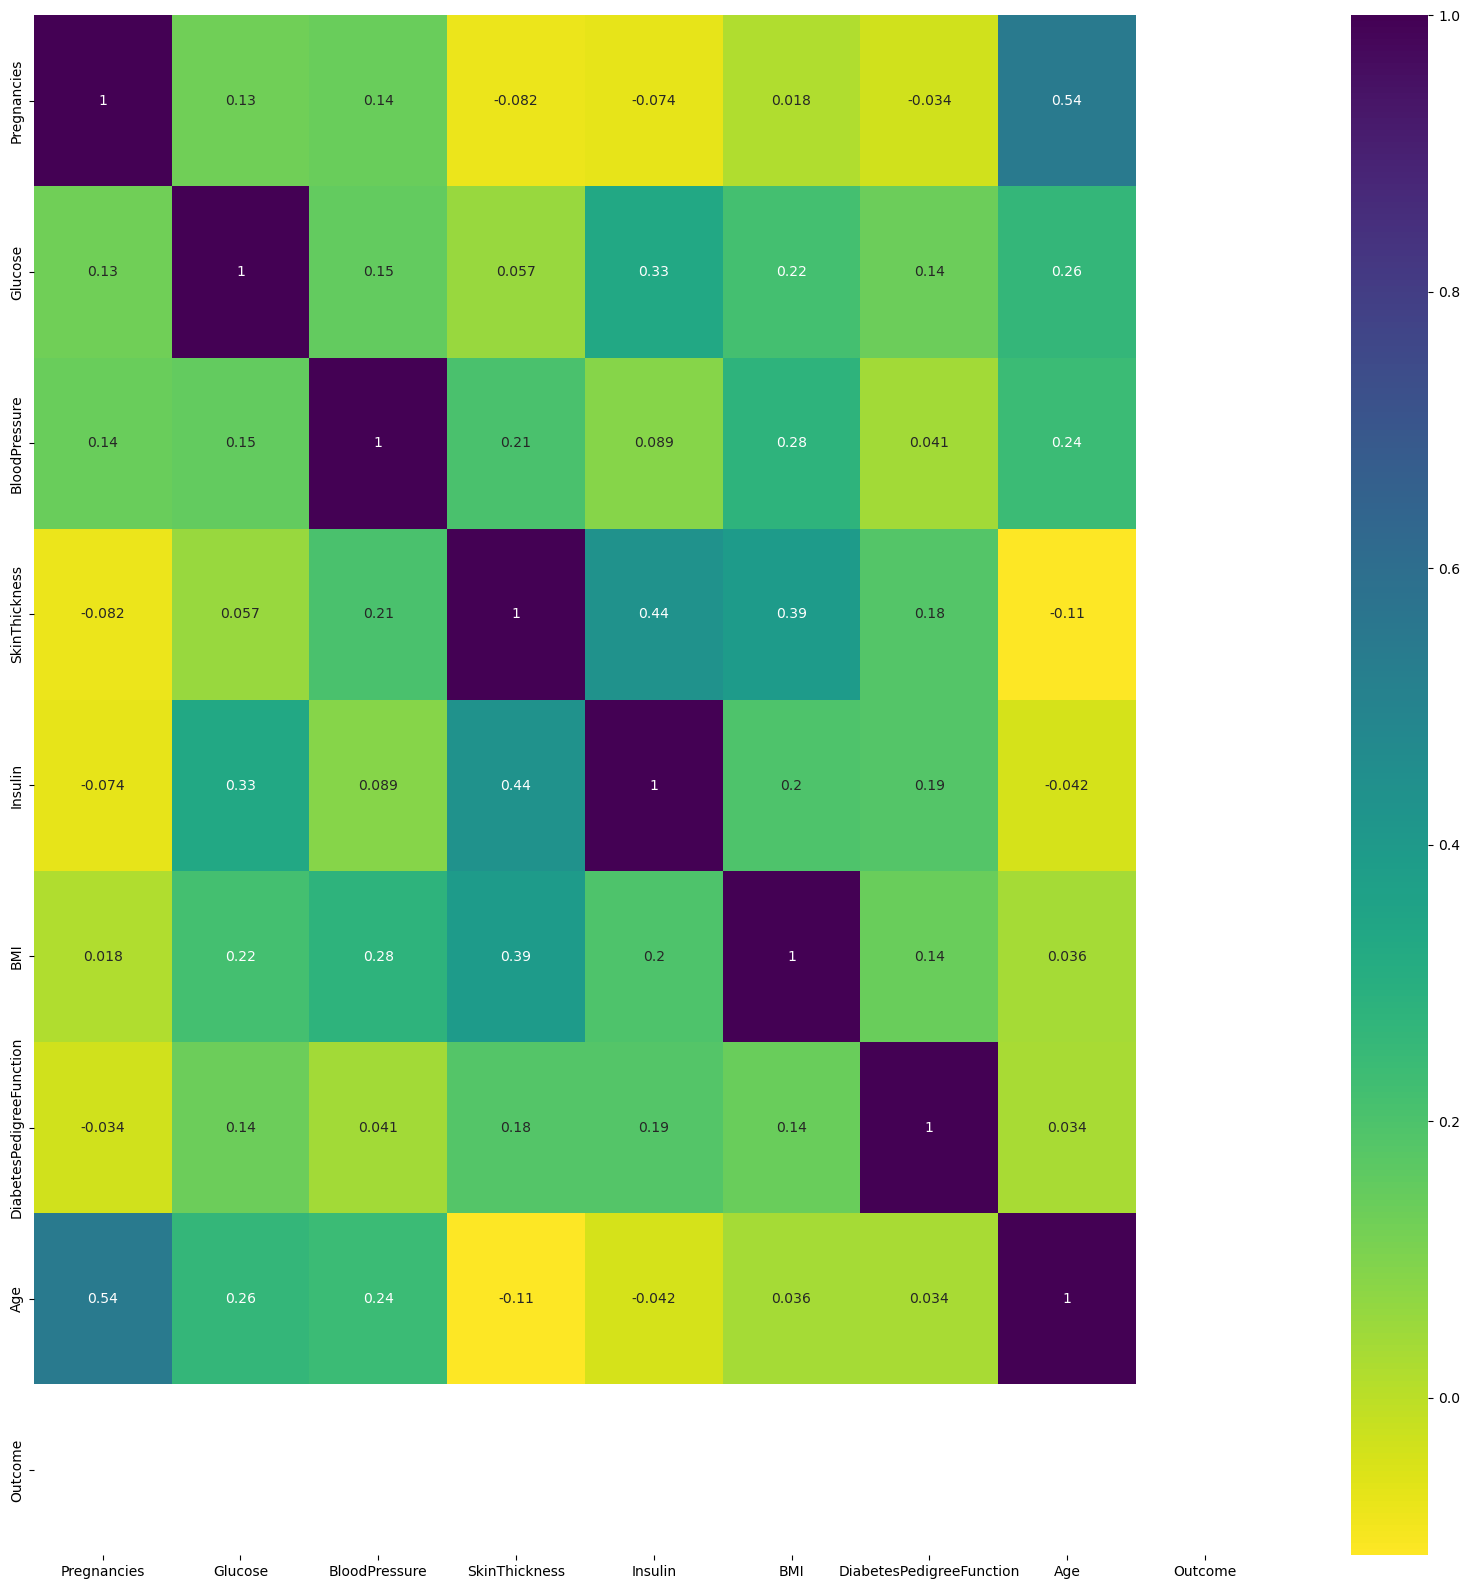

In [148]:
from matplotlib import pyplot as plt

df['Outcome'] = (df['Outcome'] == '0').astype(int)

corr = df.corr()

plt.figure(figsize = (20,20))

# heatmap 
sns.heatmap(corr , cmap='viridis_r' , annot=True)
plt.show()

# correlation : -1 to 1

In [149]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,NaN
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,NaN
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,NaN
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,NaN
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,NaN
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,NaN
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,NaN
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


### FEATURE SELECTION

In [151]:
print(corr.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(df['Outcome'].dtype)
print('Outcome' in df.columns)
print('Outcome' in df.corr().columns)


int32
True
True


In [153]:
cor_target = abs(corr['Outcome'])

# select better correlated features
# this is the filtering step
# it creates a new list of relevnt features

relevant_features = cor_target[cor_target > 0.1]

# 0.25 is user-defined. It is hyper-parameter value
# collect the name of features
# list comprehension

names = [index for index,value in relevant_features.items()]

# drop the target variable from the results
# names.remove("Outcome")

pprint.pprint(names)

[]


In [155]:
print(cor_target)

Pregnancies                NaN
Glucose                    NaN
BloodPressure              NaN
SkinThickness              NaN
Insulin                    NaN
BMI                        NaN
DiabetesPedigreeFunction   NaN
Age                        NaN
Name: Outcome, dtype: float64


In [154]:
corr = df.corr()

# Absolute correlation with Outcome (drop Outcome itself)
cor_target = abs(corr['Outcome']).drop('Outcome')

# Filter features with correlation above threshold (say 0.2)
relevant_features = cor_target[cor_target > 0.15]

# Extract names of selected features
names = [index for index, value in relevant_features.items()]

pprint.pprint(names)

[]
